In [2]:
import sys
sys.path.append("../../../")

## 数据

In [3]:
import matplotlib.pyplot as plt
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter

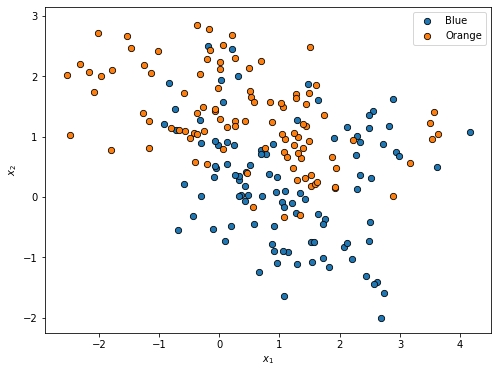

In [3]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train)
plt.show()

## 自适应提升

In [4]:
from pylib.utils.functions_for_classification import plot_decision_boundary
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

In [13]:
sk_adb = AdaBoostClassifier(algorithm='SAMME', random_state=42)
sk_adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [14]:
train_err = 1 - sk_adb.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.135


In [15]:
test_err = 1 - sk_adb.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.238


### 寻找最优参数

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'n_estimators': np.arange(100, 1100, 100),
              'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5]}

In [18]:
sk_adb_cv = GridSearchCV(
    AdaBoostClassifier(algorithm='SAMME'),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1
)
sk_adb_cv.fit(X_train, y_train)

E:\a-soft\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
best_param = sk_adb_cv.best_params_
print("最优参数：n_estimators={}, learning_rate={}".format(
    best_param['n_estimators'], best_param['learning_rate']))

最优参数：n_estimators=200, learning_rate=0.5


### 使用最优参数模型

In [21]:
sk_adb_best = sk_adb_cv.best_estimator_

In [22]:
train_err = 1 - sk_adb_best.score(X_train, y_train)
print("训练样本误差: {:.3f}".format(train_err))

训练样本误差: 0.135


In [23]:
test_err = 1 - sk_adb_best.score(X_test, y_test)
print("测试样本误差: {:.3f}".format(test_err))

测试样本误差: 0.234


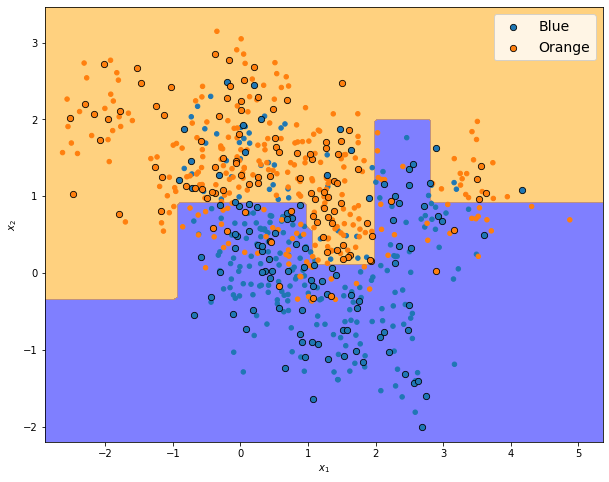

In [27]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, sk_adb_best)
plt.show()